<a href="https://colab.research.google.com/github/srk310590/First_nlp/blob/master/Disaster_Identifier_090320.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [0]:
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

Code to upload a file from drive

In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import io

In [0]:
train_df = pd.read_csv(io.BytesIO(uploaded['Filename.csv']))
# Dataset is now stored in a Pandas Dataframe

KeyError: ignored

In [0]:
url1 = "https://raw.githubusercontent.com/srk310590/First_nlp/master/train.csv"
url2 = "https://raw.githubusercontent.com/srk310590/First_nlp/master/test.csv"

In [0]:
train_df = pd.read_csv(url1) 

In [6]:
train_df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [0]:
test_df = pd.read_csv(url2)

In [0]:
train1 = train_df['text'].str.replace('[^A-Za-z\s]+', '')
test1  = test_df['text'].str.replace('[^A-Za-z\s]+', '')

In [0]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

In [0]:
train2 = train1.str.lower()
test2  = test1.str.lower()

In [0]:
import nltk

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stop = stopwords.words('english')

In [0]:
STOPWORDS  = stopwords.words('english')

In [0]:
train3 = train2.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

In [0]:
vec = CountVectorizer()
X = vec.fit_transform(train3)
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

      aa  aaaa  aaaaaaallll  aaaaaand  ...  zumiez  zurich  zxathetis  zzzz
0      0     0            0         0  ...       0       0          0     0
1      0     0            0         0  ...       0       0          0     0
2      0     0            0         0  ...       0       0          0     0
3      0     0            0         0  ...       0       0          0     0
4      0     0            0         0  ...       0       0          0     0
...   ..   ...          ...       ...  ...     ...     ...        ...   ...
7608   0     0            0         0  ...       0       0          0     0
7609   0     0            0         0  ...       0       0          0     0
7610   0     0            0         0  ...       0       0          0     0
7611   0     0            0         0  ...       0       0          0     0
7612   0     0            0         0  ...       0       0          0     0

[7613 rows x 21339 columns]


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df, train_df['target'], test_size=0.2, random_state=42)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6090, 21339)
(1523, 21339)
(6090,)
(1523,)


In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)

In [0]:
model = clf.fit(X_train, y_train)

In [0]:
# Make predictions
preds = model.predict(X_test)
print(preds)

[0 0 0 ... 1 1 0]


In [0]:
from sklearn.metrics import accuracy_score

In [0]:
# Evaluate accuracy
print(accuracy_score(y_test, preds))

0.7800393959290873


In [0]:
from sklearn.metrics import f1_score

In [0]:
f1_score(y_test, preds, zero_division=1)

0.7058823529411765

### Predict for Test tweets

In [0]:
test3 = test2.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [0]:
test3

0                             happened terrible car crash
1       heard earthquake different cities stay safe ev...
2       forest fire spot pond geese fleeing across str...
3                   apocalypse lighting spokane wildfires
4                     typhoon soudelor kills china taiwan
                              ...                        
3258    earthquake safety los angeles safety fasteners...
3259    storm ri worse last hurricane cityampothers ha...
3260      green line derailment chicago httptcoutbxlcbiuy
3261    meg issues hazardous weather outlook hwo httpt...
3262    cityofcalgary activated municipal emergency pl...
Name: text, Length: 3263, dtype: object

In [0]:
temp = vec.transform(test3)

In [0]:
temp1 = temp.toarray()

In [0]:
len(temp1[1])

11977

In [0]:
vec.transform(test3)

<3263x21339 sparse matrix of type '<class 'numpy.int64'>'
	with 24579 stored elements in Compressed Sparse Row format>

In [0]:
Y = vec.transform(test3)
df_test = pd.DataFrame(Y.toarray(), columns=vec.get_feature_names())
print(df_test)

      aa  aaaa  aaaaaaallll  aaaaaand  ...  zumiez  zurich  zxathetis  zzzz
0      0     0            0         0  ...       0       0          0     0
1      0     0            0         0  ...       0       0          0     0
2      0     0            0         0  ...       0       0          0     0
3      0     0            0         0  ...       0       0          0     0
4      0     0            0         0  ...       0       0          0     0
...   ..   ...          ...       ...  ...     ...     ...        ...   ...
3258   0     0            0         0  ...       0       0          0     0
3259   0     0            0         0  ...       0       0          0     0
3260   0     0            0         0  ...       0       0          0     0
3261   0     0            0         0  ...       0       0          0     0
3262   0     0            0         0  ...       0       0          0     0

[3263 rows x 21339 columns]


In [0]:
preds_test = model.predict(df_test)
print(preds_test)

[0 1 1 ... 1 1 1]


In [0]:
temp  = pd.DataFrame([test_df['id'],preds_test])

In [0]:
type(preds_test)

numpy.ndarray

In [0]:
test_df['id']

0           0
1           2
2           3
3           9
4          11
        ...  
3258    10861
3259    10865
3260    10868
3261    10874
3262    10875
Name: id, Length: 3263, dtype: int64

In [0]:
preds_test

array([0, 1, 1, ..., 1, 1, 1])

In [0]:
pd.concat([test_df['id'],preds_test], axis=1)

TypeError: ignored

In [0]:
np.transpose(preds_test)

array([0, 1, 1, ..., 1, 1, 1])

In [0]:
results  = np.transpose(temp)

In [0]:
results.to_csv("C:/Kaggle/NLP - Disaster or not/submission1.csv")

FileNotFoundError: ignored

In [0]:
from google.colab import files

In [0]:
results.to_csv('submission1.csv') 
files.download('submission1.csv')

#### Second approach

In [0]:
train3

0            deeds reason earthquake may allah forgive us
1                   forest fire near la ronge sask canada
2       residents asked shelter place notified officer...
3       people receive wildfires evacuation orders cal...
4       got sent photo ruby alaska smoke wildfires pou...
                              ...                        
7608    two giant cranes holding bridge collapse nearb...
7609    ariaahrary thetawniest control wild fires cali...
7610                utckm volcano hawaii httptcozdtoydebj
7611    police investigating ebike collided car little...
7612    latest homes razed northern california wildfir...
Name: text, Length: 7613, dtype: object

In [0]:
temp2  = pd.DataFrame([train3, train_df['target']])

In [0]:
temp2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,7573,7574,7575,7576,7577,7578,7579,7580,7581,7582,7583,7584,7585,7586,7587,7588,7589,7590,7591,7592,7593,7594,7595,7596,7597,7598,7599,7600,7601,7602,7603,7604,7605,7606,7607,7608,7609,7610,7611,7612
text,deeds reason earthquake may allah forgive us,forest fire near la ronge sask canada,residents asked shelter place notified officer...,people receive wildfires evacuation orders cal...,got sent photo ruby alaska smoke wildfires pou...,rockyfire update california hwy closed directi...,flood disaster heavy rain causes flash floodin...,im top hill see fire woods,theres emergency evacuation happening building...,im afraid tornado coming area,three people died heat wave far,haha south tampa getting flooded hah wait seco...,raining flooding florida tampabay tampa days i...,flood bago myanmar arrived bago,damage school bus multi car crash breaking,whats man,love fruits,summer lovely,car fast,goooooooaaaaaal,ridiculous,london cool,love skiing,wonderful day,looooool,wayi cant eat shit,nyc last week,love girlfriend,cooool,like pasta,end,bbcmtd wholesale markets ablaze httptcolhyxeohyc,always try bring heavy metal rt httptcoyaoexngw,africanbaze breaking newsnigeria flag set abla...,crying set ablaze,plus side look sky last night ablaze httptcoqq...,phdsquares mufc theyve built much hype around ...,inec office abia set ablaze httptcoimaomknna,barbados bridgetown jamaica two cars set ablaz...,ablaze lord,...,awesome time gettin wrecked bowling last night...,cramer words wrecked dis stock httptcoudxobyua,bright side wrecked httptcoueatxrhys,wrecked httptcoyisyzkc,widda hes gone relax thought wife wrecked cake...,jtruff cameronhacker wrecked,three days work theyve pretty much wrecked hah...,fx forex trading cramer igers words wrecked di...,engineshed great atmosphere british lion gig t...,cramer igers words wrecked disneys stock cnbc ...,pic yr old pkk suicide bomber detonated bomb t...,boxes ready explode exploding kittens finally ...,calgary police flood road closures calgary htt...,sismo detectado japn seismic intensity iwate m...,sirens everywhere,breaking isis claims responsibility mosque att...,omg earthquake,severe weather bulletin typhoon hannaph soudel...,heat wave warning aa ayyo dei plan visit frien...,group suicide bomber detonated explosivespacke...,heard really loud bang everyone asleep great,gas thing exploded heard screams whole street ...,nws flash flood warning continued shelby count...,rt livingsafely nws issues severe thunderstorm...,mh aircraft debris found la reunion missing ma...,fatherofthree lost control car overtaking coll...,earthquake km ssw anza california iphone users...,evacuation order lifted town roosevelt httptco...,breaking la refugio oil spill may costlier big...,siren went wasnt forney tornado warning,officials say quarantine place alabama home po...,worldnews fallen powerlines glink tram update ...,flip side im walmart bomb everyone evacuate st...,suicide bomber kills saudi security site mosqu...,stormchase violent record breaking ef el reno ...,two giant cranes holding bridge collapse nearb...,ariaahrary thetawniest control wild fires cali...,utckm volcano hawaii httptcozdtoydebj,police investigating ebike collided car little...,latest homes razed northern california wildfir...
target,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [0]:
temp3 = np.transpose(temp2)

In [0]:
temp3

,text,target
0,deeds reason earthquake may allah forgive us,1
1,forest fire near la ronge sask canada,1
2,residents asked shelter place notified officer...,1
3,people receive wildfires evacuation orders cal...,1
4,got sent photo ruby alaska smoke wildfires pou...,1
...,...,...
7608,two giant cranes holding bridge collapse nearb...,1
7609,ariaahrary thetawniest control wild fires cali...,1
7610,utckm volcano hawaii httptcozdtoydebj,1
7611,police investigating ebike collided car little...,1


#### Kaggle Approach

In [12]:
print('Training Set Shape = {}'.format(train_df.shape))
print('Training Set Memory Usage = {:.2f} MB'.format(train_df.memory_usage().sum() / 1024**2))
print('Test Set Shape = {}'.format(test_df.shape))
print('Test Set Memory Usage = {:.2f} MB'.format(test_df.memory_usage().sum() / 1024**2))

Training Set Shape = (7613, 5)
Training Set Memory Usage = 0.29 MB
Test Set Shape = (3263, 4)
Test Set Memory Usage = 0.10 MB


Distributions of meta features in classes and datasets can be helpful to identify disaster tweets. It looks like disaster tweets are written in a more formal way with longer words compared to non-disaster tweets because most of them are coming from news agencies. Non-disaster tweets have more typos than disaster tweets because they are coming from individual users. The meta features used for the analysis are;

* word_count -  number of words in text
* unique_word_count - number of unique words in text
* stop_word_count number of stop words in text
* url_count number of urls in text
* mean_word_length average character count in words
* char_count number of characters in text
* punctuation_count number of punctuations in text
* hashtag_count number of hashtags (#) in text
* mention_count number of mentions (@) in text

In [0]:
df_train = train_df
df_test  = test_df

In [0]:
# word_count
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
df_test['word_count'] = df_test['text'].apply(lambda x: len(str(x).split()))

# unique_word_count
df_train['unique_word_count'] = df_train['text'].apply(lambda x: len(set(str(x).split())))
df_test['unique_word_count'] = df_test['text'].apply(lambda x: len(set(str(x).split())))

# stop_word_count
df_train['stop_word_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))
df_test['stop_word_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if w in STOPWORDS]))

# url_count
df_train['url_count'] = df_train['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))
df_test['url_count'] = df_test['text'].apply(lambda x: len([w for w in str(x).lower().split() if 'http' in w or 'https' in w]))

# mean_word_length
df_train['mean_word_length'] = df_train['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
df_test['mean_word_length'] = df_test['text'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

# char_count
df_train['char_count'] = df_train['text'].apply(lambda x: len(str(x)))
df_test['char_count'] = df_test['text'].apply(lambda x: len(str(x)))

# punctuation_count
#df_train['punctuation_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
#df_test['punctuation_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

# hashtag_count
df_train['hashtag_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '#']))
df_test['hashtag_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '#']))

# mention_count
df_train['mention_count'] = df_train['text'].apply(lambda x: len([c for c in str(x) if c == '@']))
df_test['mention_count'] = df_test['text'].apply(lambda x: len([c for c in str(x) if c == '@']))

In [21]:
df_train.head()

,id,keyword,location,text,target,word_count,unique_word_count,stop_word_count,url_count,mean_word_length,char_count,hashtag_count,mention_count
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,13,13,6,0,4.384615,69,1,0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,7,7,0,0,4.571429,38,0,0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,22,20,11,0,5.090909,133,0,0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,8,8,1,0,7.125000,65,1,0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,16,15,7,0,4.500000,88,2,0


In [0]:
import seaborn as sns

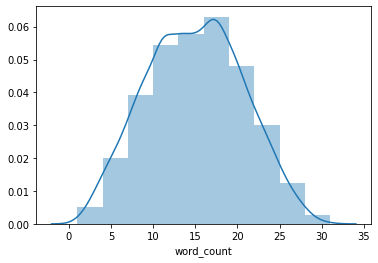

In [24]:
sns.distplot(df_train['word_count'], bins=10, kde=True)

In [0]:
from collections import defaultdict

In [0]:
DISASTER_TWEETS  = df_train.index[df_train['target'] == 1]

In [32]:
DISASTER_TWEETS

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            7603, 7604, 7605, 7606, 7607, 7608, 7609, 7610, 7611, 7612],
           dtype='int64', length=3271)

In [33]:
def generate_ngrams(text, n_gram=1):
    token = [token for token in text.lower().split(' ') if token != '' if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [' '.join(ngram) for ngram in ngrams]

N = 100

# Unigrams
disaster_unigrams = defaultdict(int)
nondisaster_unigrams = defaultdict(int)

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        disaster_unigrams[word] += 1
        
for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet):
        nondisaster_unigrams[word] += 1
        
df_disaster_unigrams = pd.DataFrame(sorted(disaster_unigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_unigrams = pd.DataFrame(sorted(nondisaster_unigrams.items(), key=lambda x: x[1])[::-1])

# Bigrams
disaster_bigrams = defaultdict(int)
nondisaster_bigrams = defaultdict(int)

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        disaster_bigrams[word] += 1
        
for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=2):
        nondisaster_bigrams[word] += 1
        
df_disaster_bigrams = pd.DataFrame(sorted(disaster_bigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_bigrams = pd.DataFrame(sorted(nondisaster_bigrams.items(), key=lambda x: x[1])[::-1])

# Trigrams
disaster_trigrams = defaultdict(int)
nondisaster_trigrams = defaultdict(int)

for tweet in df_train[DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        disaster_trigrams[word] += 1
        
for tweet in df_train[~DISASTER_TWEETS]['text']:
    for word in generate_ngrams(tweet, n_gram=3):
        nondisaster_trigrams[word] += 1
        
df_disaster_trigrams = pd.DataFrame(sorted(disaster_trigrams.items(), key=lambda x: x[1])[::-1])
df_nondisaster_trigrams = pd.DataFrame(sorted(nondisaster_trigrams.items(), key=lambda x: x[1])[::-1])

KeyError: ignored